In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar


In [87]:
pd.DataFrame

pandas.core.frame.DataFrame

In [88]:
df = pd.read_csv('data.csv')

In [89]:
df.rename(columns={'transit_timestamp': 'tarih'}, inplace=True)
df.rename(columns={'transit_mode': 'arac'}, inplace=True)
df.rename(columns={'station_complex_id': 'istasyonId'}, inplace=True)
df.rename(columns={'station_complex': 'istasyonAdi'}, inplace=True)
df.rename(columns={'borough': 'sehir'}, inplace=True)
df.rename(columns={'ridership': 'yolcuSayisi'}, inplace=True)

In [90]:
df['tarih'] = pd.to_datetime(df['tarih'])
df['ay'] = df['tarih'].dt.month
df['gun'] = df['tarih'].dt.day
df['haftanin_gunu'] = df['tarih'].dt.day_name()
df['saat'] = df['tarih'].dt.hour


In [91]:
df.drop("transfers", axis=1, inplace=True)
df.drop(df[df['ay'] == 6].index, inplace=True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6404989 entries, 0 to 6404988
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   tarih          datetime64[ns]
 1   arac           object        
 2   istasyonId     int64         
 3   istasyonAdi    object        
 4   sehir          object        
 5   yolcuSayisi    int64         
 6   ay             int32         
 7   gun            int32         
 8   haftanin_gunu  object        
 9   saat           int32         
dtypes: datetime64[ns](1), int32(3), int64(2), object(4)
memory usage: 415.4+ MB


In [93]:
df.head(5)

,tarih,arac,istasyonId,istasyonAdi,sehir,yolcuSayisi,ay,gun,haftanin_gunu,saat
0,2023-03-01 07:00:00,subway,52,Avenue U (Q),Brooklyn,223,3,1,Wednesday,7
1,2023-03-01 07:00:00,subway,52,Avenue U (Q),Brooklyn,213,3,1,Wednesday,7
2,2023-03-01 07:00:00,subway,52,Avenue U (Q),Brooklyn,38,3,1,Wednesday,7
3,2023-03-01 07:00:00,subway,53,Neck Rd (Q),Brooklyn,25,3,1,Wednesday,7
4,2023-03-01 07:00:00,subway,53,Neck Rd (Q),Brooklyn,155,3,1,Wednesday,7


Rastgele 5 veriyi inceleyelim

In [94]:
df.sample(5)

,tarih,arac,istasyonId,istasyonAdi,sehir,yolcuSayisi,ay,gun,haftanin_gunu,saat
4488214,2023-05-04 13:00:00,subway,308,Cathedral Pkwy (110 St) (1),Manhattan,14,5,4,Thursday,13
2880587,2023-04-11 16:00:00,subway,356,"Church Av (2,5)",Brooklyn,31,4,11,Tuesday,16
5398288,2023-05-17 13:00:00,subway,160,"72 St (C,B)",Manhattan,22,5,17,Wednesday,13
1998038,2023-03-29 22:00:00,subway,357,"Beverly Rd (2,5)",Brooklyn,1,3,29,Wednesday,22
6129486,2023-05-27 23:00:00,subway,385,176 St (4),Bronx,3,5,27,Saturday,23


In [95]:
df.columns

Index(['tarih', 'arac', 'istasyonId', 'istasyonAdi', 'sehir', 'yolcuSayisi',
       'ay', 'gun', 'haftanin_gunu', 'saat'],
      dtype='object')

In [96]:
def kisalt(istasyonAdi):
    return ' '.join(istasyonAdi.split()[:2])

In [97]:
df['istasyonAdi'] = df['istasyonAdi'].apply(kisalt)

In [98]:
passenger_counts = df.groupby('istasyonAdi')['yolcuSayisi'].sum()
passenger_counts = df.groupby(['istasyonAdi', 'tarih'])['yolcuSayisi'].sum()
print(passenger_counts)


istasyonAdi  tarih              
1 Av         2023-03-01 07:00:00    1081
             2023-03-01 08:00:00    2091
             2023-03-01 09:00:00    1336
             2023-03-01 10:00:00     743
             2023-03-01 11:00:00     676
                                    ... 
Zerega Av    2023-05-31 19:00:00      30
             2023-05-31 20:00:00      24
             2023-05-31 21:00:00      17
             2023-05-31 22:00:00      15
             2023-05-31 23:00:00      11
Name: yolcuSayisi, Length: 734817, dtype: int64


In [99]:

en_cok_yolcu_istasyonlar = df.groupby('istasyonAdi')['yolcuSayisi'].sum().nlargest(5).reset_index()
en_cok_yolcu_istasyonlar['istasyonAdi'] = en_cok_yolcu_istasyonlar['istasyonAdi']

print(en_cok_yolcu_istasyonlar)

        istasyonAdi  yolcuSayisi
0       Times Sq-42     10871669
1        34 St-Penn      8014668
2  Grand Central-42      7692309
3             86 St      6630082
4      34 St-Herald      6030471


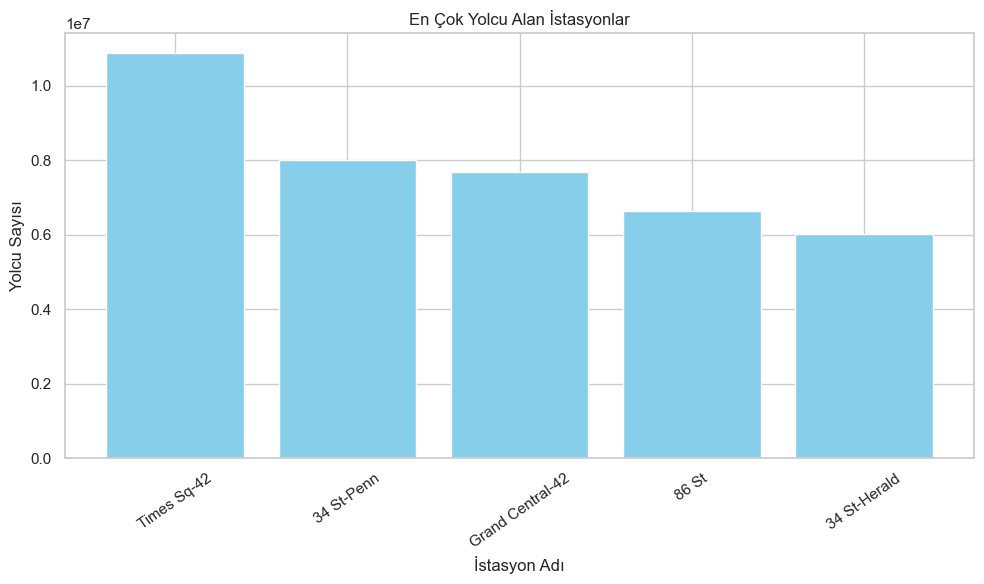

In [100]:
plt.figure(figsize=(10, 6))
plt.bar(en_cok_yolcu_istasyonlar['istasyonAdi'], en_cok_yolcu_istasyonlar['yolcuSayisi'], color='skyblue')
plt.xlabel('İstasyon Adı')
plt.ylabel('Yolcu Sayısı')
plt.title('En Çok Yolcu Alan İstasyonlar')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

3 aylık veri taramasında şuan için en yoğun 5 istasyon

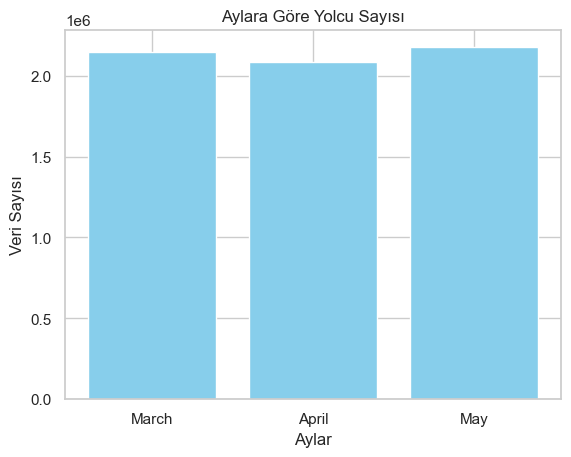

In [101]:
aylar_grup = df.groupby('ay').size()
ay_isimleri = [calendar.month_name[ay] for ay in range(1, 13)]
plt.bar(aylar_grup.index, aylar_grup.values, color='skyblue')
plt.xlabel('Aylar')
plt.ylabel('Veri Sayısı')
plt.title('Aylara Göre Yolcu Sayısı')
plt.xticks(aylar_grup.index, [ay_isimleri[ay-1] for ay in aylar_grup.index])
plt.show()

In [102]:
en_yogun_saatler = df.groupby('saat')['yolcuSayisi'].sum().sort_values(ascending=False).reset_index()
en_yogun_saatler.head(5) 


,saat,yolcuSayisi
0,17,28388137
1,8,24692227
2,16,24620914
3,18,22465212
4,15,21903217


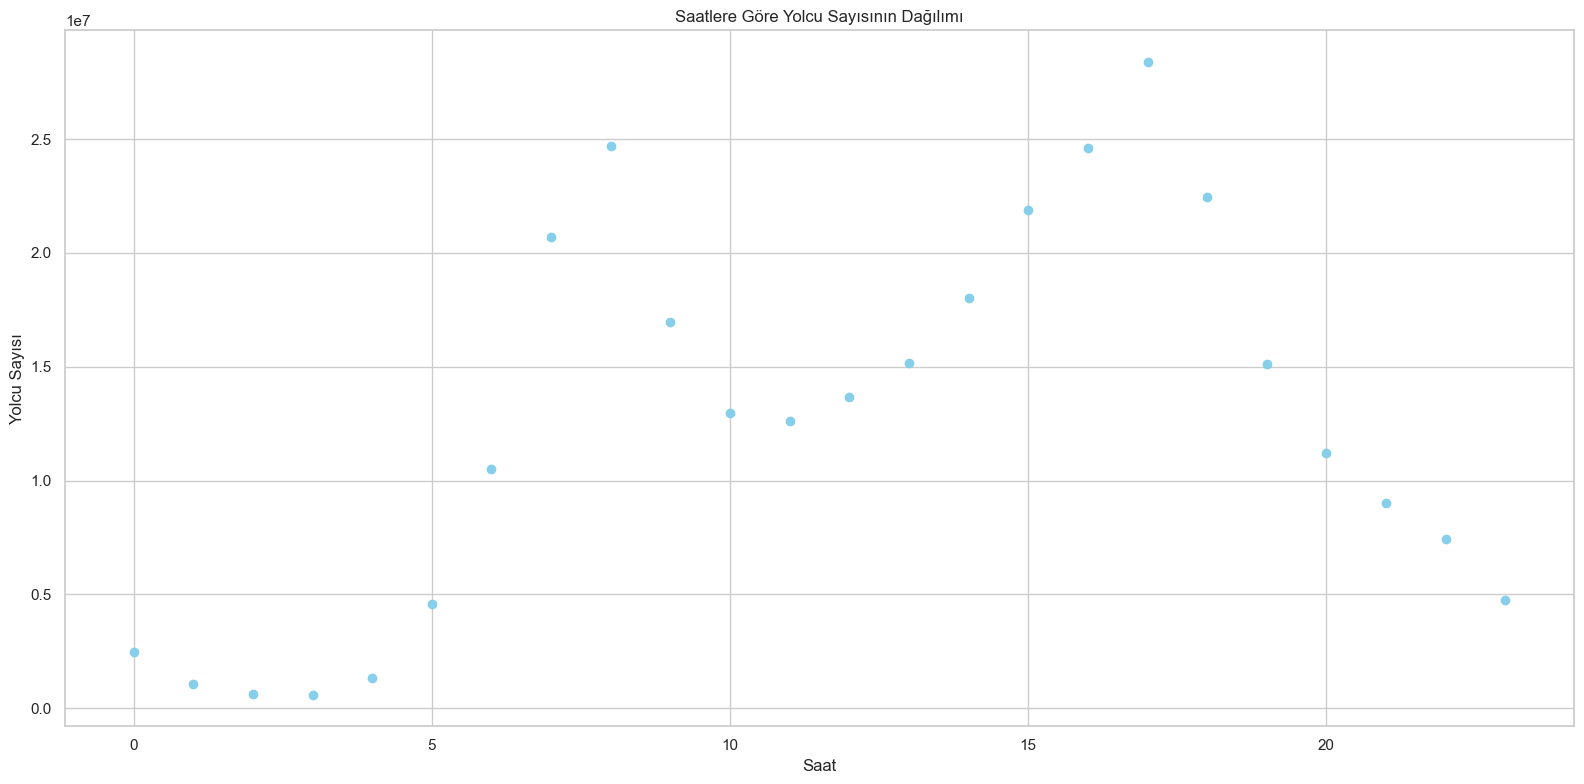

In [103]:
plt.figure(figsize=[16, 8])
plt.scatter(en_yogun_saatler['saat'], en_yogun_saatler['yolcuSayisi'], color='skyblue')
plt.xlabel('Saat')
plt.ylabel('Yolcu Sayısı')
plt.title('Saatlere Göre Yolcu Sayısının Dağılımı')
plt.grid(True)
plt.tight_layout()
plt.show()


Dikkat çekici bir detay! En yoğun saatlerin hepsi işi gidiş ve dönüş saatleri.

In [104]:
en_yogun_gunler = df.groupby('haftanin_gunu')['yolcuSayisi'].sum().sort_values(ascending=False).reset_index()
en_yogun_gunler.head(7)

,haftanin_gunu,yolcuSayisi
0,Wednesday,54558018
1,Thursday,50459620
2,Tuesday,50008287
3,Friday,46599572
4,Monday,43916834
5,Saturday,30452176
6,Sunday,24853097


Yine dikkat çekici bir detay! En yoğun günler hafta içi ve Salı-Çarşamba-Perşembe günleri.

In [105]:

en_yogun_gunler_mart_ay = df[df['ay'] == 3].groupby(['ay', 'gun','haftanin_gunu', 'saat'])['yolcuSayisi'].sum().nlargest(20).reset_index()
print(en_yogun_gunler_mart_ay)


    ay  gun haftanin_gunu  saat  yolcuSayisi
0    3    8     Wednesday    17       396514
1    3   15     Wednesday    17       395255
2    3    8     Wednesday     8       394771
3    3   15     Wednesday     8       394622
4    3   29     Wednesday    17       394515
5    3    7       Tuesday    17       394175
6    3    1     Wednesday     8       392956
7    3    7       Tuesday     8       392548
8    3   21       Tuesday    17       391277
9    3   21       Tuesday     8       391205
10   3   29     Wednesday     8       390347
11   3   16      Thursday    17       389883
12   3   28       Tuesday    17       388555
13   3    1     Wednesday    17       388490
14   3   28       Tuesday     8       388440
15   3    9      Thursday    17       386939
16   3   22     Wednesday    17       386652
17   3    2      Thursday    17       382988
18   3   30      Thursday    17       382244
19   3   22     Wednesday     8       380129


In [106]:
en_yogun_gunler_nisan_ay = df[df['ay'] == 4].groupby(['ay', 'gun','haftanin_gunu', 'saat'])['yolcuSayisi'].sum().nlargest(20).reset_index()
print(en_yogun_gunler_nisan_ay)


    ay  gun haftanin_gunu  saat  yolcuSayisi
0    4   25       Tuesday    17       407620
1    4   26     Wednesday    17       405764
2    4   18       Tuesday    17       402052
3    4   25       Tuesday     8       400918
4    4   19     Wednesday    17       400890
5    4   26     Wednesday     8       399179
6    4   27      Thursday    17       399092
7    4   19     Wednesday     8       397153
8    4    4       Tuesday    17       396852
9    4   18       Tuesday     8       396330
10   4   20      Thursday    17       393446
11   4    4       Tuesday     8       389740
12   4    5     Wednesday    17       383493
13   4   27      Thursday     8       383089
14   4   20      Thursday     8       379831
15   4   11       Tuesday    17       376065
16   4    5     Wednesday     8       370393
17   4   12     Wednesday    17       367110
18   4   13      Thursday    17       366034
19   4    3        Monday    17       363675


In [107]:
en_yogun_gunler_mayis_ay = df[df['ay'] == 5].groupby(['ay', 'gun','haftanin_gunu', 'saat'])['yolcuSayisi'].sum().nlargest(20).reset_index()
print(en_yogun_gunler_mayis_ay)


    ay  gun haftanin_gunu  saat  yolcuSayisi
0    5    3     Wednesday    17       421314
1    5   17     Wednesday    17       417436
2    5   16       Tuesday    17       412660
3    5   23       Tuesday    17       410228
4    5    9       Tuesday    17       408138
5    5   10     Wednesday    17       407557
6    5   18      Thursday    17       407069
7    5   24     Wednesday    17       406332
8    5    2       Tuesday    17       404833
9    5   31     Wednesday    17       402109
10   5    2       Tuesday     8       401042
11   5   11      Thursday    17       400336
12   5   17     Wednesday     8       400110
13   5    3     Wednesday     8       397459
14   5    9       Tuesday     8       394101
15   5   16       Tuesday     8       392946
16   5    4      Thursday    17       392895
17   5   10     Wednesday     8       392297
18   5   23       Tuesday     8       390775
19   5   31     Wednesday     8       387529


En yoğun ay Mayıs ayı ve genel olarak Salı ve Çarşamba günleri en yoğun günler. En yoğun saatler işe giriş ve çıkış saatleri olan 08 ve 17

In [108]:
value_days_mayis = pd.DataFrame(en_yogun_gunler_mayis_ay.haftanin_gunu.value_counts())
print(value_days_mayis)

               count
haftanin_gunu       
Wednesday          9
Tuesday            8
Thursday           3


In [109]:
value_days_nisan = pd.DataFrame(en_yogun_gunler_nisan_ay.haftanin_gunu.value_counts())
print(value_days_nisan)

               count
haftanin_gunu       
Tuesday            7
Wednesday          7
Thursday           5
Monday             1


In [110]:
value_days_mart = pd.DataFrame(en_yogun_gunler_mart_ay.haftanin_gunu.value_counts())
print(value_days_mart)

               count
haftanin_gunu       
Wednesday         10
Tuesday            6
Thursday           4


In [111]:
value_days_all = pd.DataFrame(df.haftanin_gunu.value_counts())
print(value_days_all)

                 count
haftanin_gunu         
Wednesday      1006874
Friday          951126
Thursday        951017
Tuesday         946936
Monday          933861
Saturday        823799
Sunday          791376


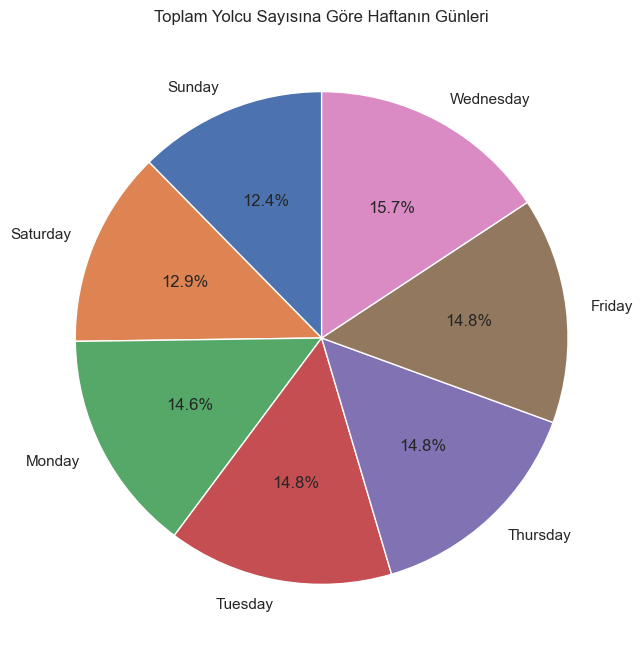

In [112]:
plt.figure(figsize=(15, 8))
sorted_value_days = value_days_all.sort_values(by='count', ascending=True)
plt.pie(sorted_value_days['count'], labels=sorted_value_days.index, autopct='%1.1f%%', startangle=90)
plt.title('Toplam Yolcu Sayısına Göre Haftanın Günleri')
plt.show()

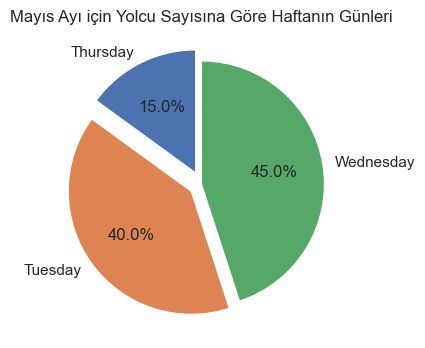

In [113]:
plt.figure(figsize=(8, 4))
sorted_may_value_days = value_days_mayis.sort_values(by='count', ascending=True)
plt.pie(sorted_may_value_days['count'], labels=sorted_may_value_days.index, autopct='%1.1f%%', startangle=90, explode=[.1, .1,0])
plt.title('Mayıs Ayı için Yolcu Sayısına Göre Haftanın Günleri')
plt.show()

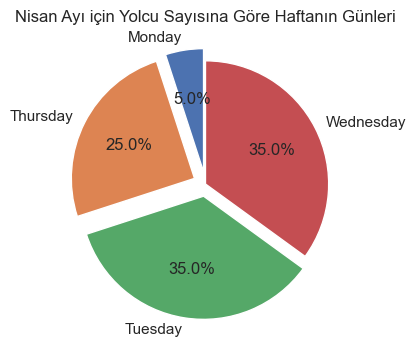

In [114]:
plt.figure(figsize=(8, 4))
sorted_april_value_days = value_days_nisan.sort_values(by='count', ascending=True)
plt.pie(sorted_april_value_days['count'], labels=sorted_april_value_days.index, autopct='%1.1f%%', startangle=90, explode=[.1,.1, .1,0])
plt.title('Nisan Ayı için Yolcu Sayısına Göre Haftanın Günleri')
plt.show()

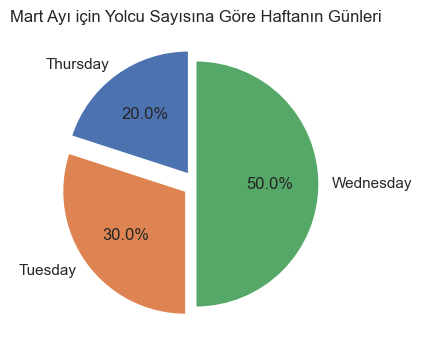

In [115]:
plt.figure(figsize=(8,4))
sorted_march_value_days = value_days_mart.sort_values(by='count', ascending=True)
plt.pie(sorted_march_value_days['count'], labels=sorted_march_value_days.index, autopct='%1.1f%%', startangle=90 , explode=[.1,.1,0])
plt.title('Mart Ayı için Yolcu Sayısına Göre Haftanın Günleri')
plt.show()

In [116]:
mayis_station = df[df['ay'] == 5]

toplam_yolcu_sayilari = mayis_station.groupby('istasyonAdi')['yolcuSayisi'].sum()
en_cok_yolcu_istasyonlar = toplam_yolcu_sayilari.nlargest(5)
en_cok_yolcu_df = pd.DataFrame({'İstasyon': en_cok_yolcu_istasyonlar.index, 'Yolcu Sayısı': en_cok_yolcu_istasyonlar.values})
print(en_cok_yolcu_df)


           İstasyon  Yolcu Sayısı
0       Times Sq-42       3801264
1        34 St-Penn       2784152
2  Grand Central-42       2696863
3             86 St       2332430
4      34 St-Herald       2086584


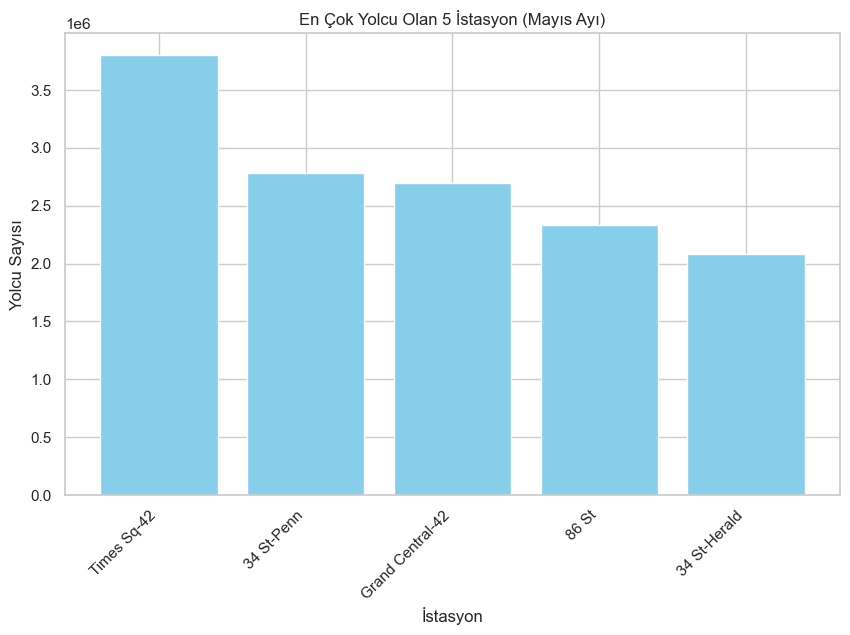

In [117]:
plt.figure(figsize=(10, 6))
plt.bar(en_cok_yolcu_df['İstasyon'], en_cok_yolcu_df['Yolcu Sayısı'], color='skyblue')
plt.xlabel('İstasyon')
plt.ylabel('Yolcu Sayısı')
plt.title('En Çok Yolcu Olan 5 İstasyon (Mayıs Ayı)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [118]:
toplam_yolcu_tumu = df.groupby('istasyonAdi')['yolcuSayisi'].sum()
en_cok_yolcu_tumu = toplam_yolcu_tumu.nlargest(5)

mayis_station = df[df['ay'] == 5]

toplam_yolcu_mayis = mayis_station.groupby('istasyonAdi')['yolcuSayisi'].sum()
en_cok_yolcu_mayis = toplam_yolcu_mayis.nlargest(5)

df_en_cok_yolcu_tumu = pd.DataFrame({'İstasyon': en_cok_yolcu_tumu.index, 'Toplam Yolcu Sayısı': en_cok_yolcu_tumu.values})
df_en_cok_yolcu_mayis = pd.DataFrame({'İstasyon': en_cok_yolcu_mayis.index, 'Mayıs Yolcu Sayısı': en_cok_yolcu_mayis.values})

df_karsilastirma_mayis = pd.merge(df_en_cok_yolcu_tumu, df_en_cok_yolcu_mayis, on='İstasyon', how='outer')
print(df_karsilastirma_mayis)


           İstasyon  Toplam Yolcu Sayısı  Mayıs Yolcu Sayısı
0      34 St-Herald              6030471             2086584
1        34 St-Penn              8014668             2784152
2             86 St              6630082             2332430
3  Grand Central-42              7692309             2696863
4       Times Sq-42             10871669             3801264


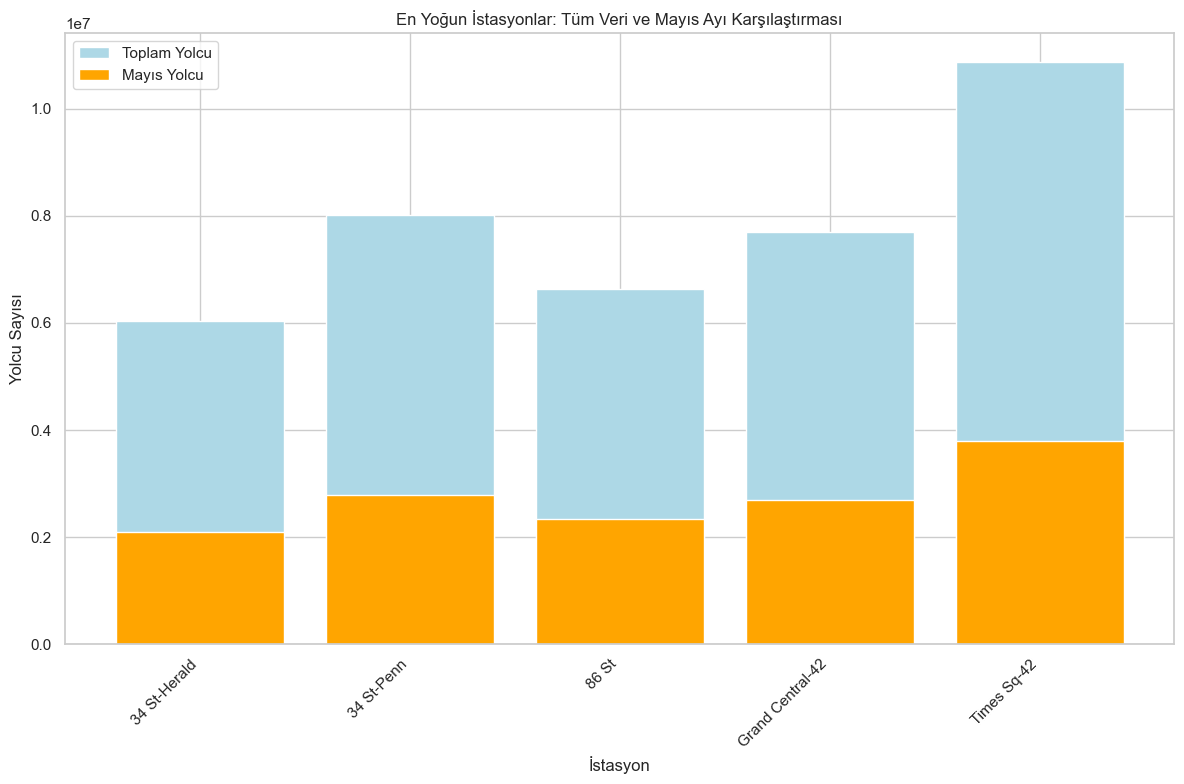

In [119]:
plt.figure(figsize=(12, 8))
plt.bar(df_karsilastirma_mayis['İstasyon'], df_karsilastirma_mayis['Toplam Yolcu Sayısı'], label='Toplam Yolcu', color='lightblue')
plt.bar(df_karsilastirma_mayis['İstasyon'], df_karsilastirma_mayis['Mayıs Yolcu Sayısı'], label='Mayıs Yolcu', color='orange')
plt.xlabel('İstasyon')
plt.ylabel('Yolcu Sayısı')
plt.title('En Yoğun İstasyonlar: Tüm Veri ve Mayıs Ayı Karşılaştırması')
plt.xticks(rotation=45, ha='right')

plt.legend()
plt.tight_layout()

plt.show()

In [120]:
mayis_salı_carsamba = df[(df['ay'] == 5) & ((df['haftanin_gunu'] == 'Tuesday') | (df['haftanin_gunu'] == 'Wednesday'))]
toplam_yolcu_sayilari = mayis_salı_carsamba.groupby('istasyonAdi')['yolcuSayisi'].sum()
en_cok_yolcu_istasyonlar = toplam_yolcu_sayilari.nlargest(5)

df_en_cok_yolcu = pd.DataFrame({'İstasyon': en_cok_yolcu_istasyonlar.index, 'Yolcu Sayısı': en_cok_yolcu_istasyonlar.values})
print(df_en_cok_yolcu)




           İstasyon  Yolcu Sayısı
0       Times Sq-42       1421924
1  Grand Central-42       1107767
2        34 St-Penn       1085406
3             86 St        871060
4             23 St        790943


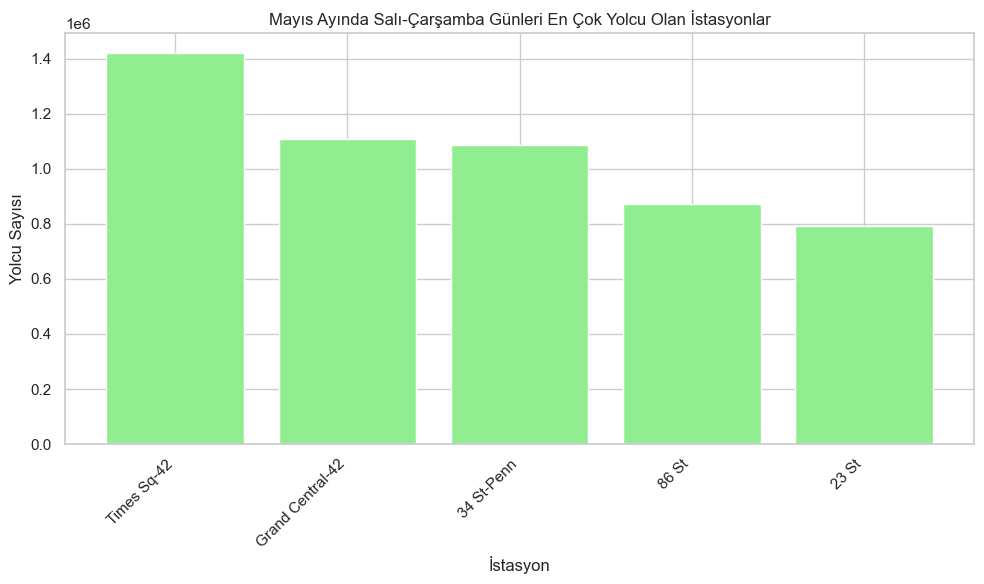

In [121]:
plt.figure(figsize=(10, 6))
plt.bar(df_en_cok_yolcu['İstasyon'], df_en_cok_yolcu['Yolcu Sayısı'], color='lightgreen')
plt.xlabel('İstasyon')
plt.ylabel('Yolcu Sayısı')
plt.title('Mayıs Ayında Salı-Çarşamba Günleri En Çok Yolcu Olan İstasyonlar')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


In [122]:
toplam_yolcu_tumu = df.groupby('istasyonAdi')['yolcuSayisi'].sum()
en_cok_yolcu_tumu = toplam_yolcu_tumu.nlargest(5)

mayis_salicarsamba_verileri = df[(df['ay'] == 5) & (df['haftanin_gunu'].isin(['Tuesday', 'Wednesday']))]
toplam_yolcu_mayis_salicarsamba = mayis_salicarsamba_verileri.groupby('istasyonAdi')['yolcuSayisi'].sum()
en_cok_yolcu_mayis_salicarsamba = toplam_yolcu_mayis_salicarsamba.nlargest(5)

df_en_cok_yolcu_tumu = pd.DataFrame({'İstasyon': en_cok_yolcu_tumu.index, 'Toplam Yolcu Sayısı': en_cok_yolcu_tumu.values})
df_en_cok_yolcu_mayis_salicarsamba = pd.DataFrame({'İstasyon': en_cok_yolcu_mayis_salicarsamba.index, 'Mayıs Salı-Çarşamba Yolcu Sayısı': en_cok_yolcu_mayis_salicarsamba.values})

df_karsilastirma = pd.merge(df_en_cok_yolcu_tumu, df_en_cok_yolcu_mayis_salicarsamba, on='İstasyon', how='outer')

df_karsilastirma['Oran'] = df_karsilastirma['Mayıs Salı-Çarşamba Yolcu Sayısı'] / df_karsilastirma['Toplam Yolcu Sayısı']
print(df_karsilastirma)

print(en_cok_yolcu_mayis_salicarsamba)


           İstasyon  Toplam Yolcu Sayısı  Mayıs Salı-Çarşamba Yolcu Sayısı  \
0             23 St                  NaN                          790943.0   
1      34 St-Herald            6030471.0                               NaN   
2        34 St-Penn            8014668.0                         1085406.0   
3             86 St            6630082.0                          871060.0   
4  Grand Central-42            7692309.0                         1107767.0   
5       Times Sq-42           10871669.0                         1421924.0   

       Oran  
0       NaN  
1       NaN  
2  0.135427  
3  0.131380  
4  0.144010  
5  0.130792  
istasyonAdi
Times Sq-42         1421924
Grand Central-42    1107767
34 St-Penn          1085406
86 St                871060
23 St                790943
Name: yolcuSayisi, dtype: int64


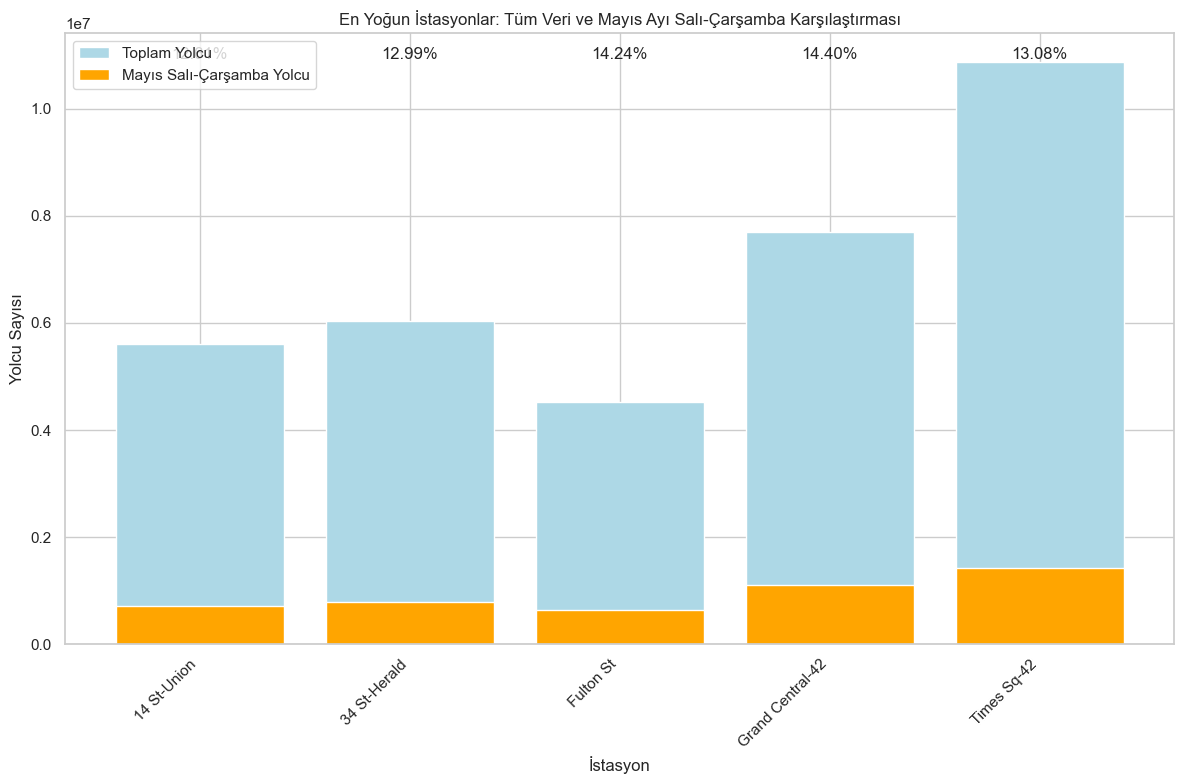

In [67]:
plt.figure(figsize=(12, 8))
plt.bar(df_karsilastirma['İstasyon'], df_karsilastirma['Toplam Yolcu Sayısı'], label='Toplam Yolcu', color='lightblue')
plt.bar(df_karsilastirma['İstasyon'], df_karsilastirma['Mayıs Salı-Çarşamba Yolcu Sayısı'], label='Mayıs Salı-Çarşamba Yolcu', color='orange')
plt.xlabel('İstasyon')
plt.ylabel('Yolcu Sayısı')
plt.title('En Yoğun İstasyonlar: Tüm Veri ve Mayıs Ayı Salı-Çarşamba Karşılaştırması')
plt.xticks(rotation=45, ha='right') 
plt.legend()

for i, v in enumerate(df_karsilastirma['Oran']):
    plt.text(i, max(df_karsilastirma['Toplam Yolcu Sayısı']) + 5, f'{v:.2%}', ha='center', va='bottom')

plt.tight_layout()

plt.show()


In [84]:
toplam_yolcu_mayis_salicas = mayis_salicarsamba_verileri.groupby('istasyonAdi')['yolcuSayisi'].sum()

en_cok_yolcu_mayis_salicas = toplam_yolcu_mayis_salicas.nlargest(5)

df_en_cok_yolcu_tumu = pd.DataFrame({'İstasyon': en_cok_yolcu_tumu.index, 'Toplam Yolcu Sayısı': en_cok_yolcu_tumu.values})
df_en_cok_yolcu_mayis_salicas = pd.DataFrame({'İstasyon': en_cok_yolcu_mayis_salicas.index, 'Mayıs Salı-Çarşamba Yolcu Sayısı': en_cok_yolcu_mayis_salicas.values})

df_karsilastirma = pd.merge(df_en_cok_yolcu_tumu, df_en_cok_yolcu_mayis_salicas, on='İstasyon', how='outer')

df_karsilastirma['Oran'] = df_karsilastirma['Mayıs Salı-Çarşamba Yolcu Sayısı'] / df_karsilastirma['Toplam Yolcu Sayısı']

print(df_karsilastirma)


                                           İstasyon  Toplam Yolcu Sayısı  \
0                  14 St-Union Sq (L,N,Q,R,W,4,5,6)              5602147   
1                 34 St-Herald Sq (B,D,F,M,N,Q,R,W)              6030471   
2                       Fulton St (A,C,J,Z,2,3,4,5)              4515319   
3                   Grand Central-42 St (S,4,5,6,7)              7692309   
4  Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)             10871669   

   Mayıs Salı-Çarşamba Yolcu Sayısı      Oran  
0                            706499  0.126112  
1                            783323  0.129894  
2                            642875  0.142376  
3                           1107767  0.144010  
4                           1421924  0.130792  


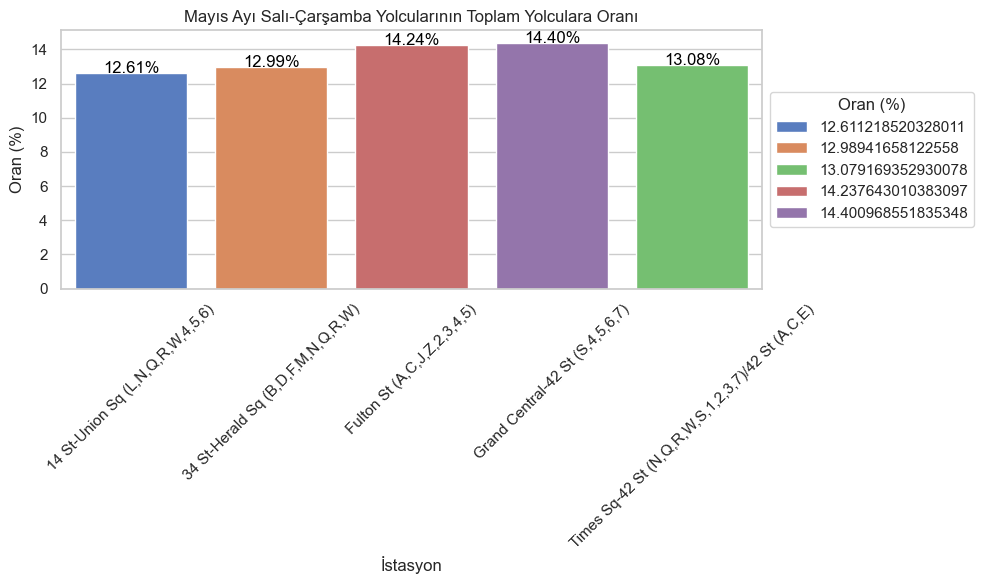

In [85]:

df_karsilastirma['Oran (%)'] = df_karsilastirma['Oran'] * 100

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

sns.barplot(data=df_karsilastirma, x='İstasyon', y='Oran (%)', hue= 'Oran (%)', palette='muted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Oran (%)')
for index, row in df_karsilastirma.iterrows():
    plt.text(row.name, row['Oran (%)'], f"{row['Oran (%)']:.2f}%", color='black', ha="center")

plt.title('Mayıs Ayı Salı-Çarşamba Yolcularının Toplam Yolculara Oranı')
plt.ylabel('Oran (%)')
plt.xlabel('İstasyon')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [57]:
toplam_yolcu = df['yolcuSayisi'].sum()
mayis_yolcu = df[df['ay'] == 5]['yolcuSayisi'].sum()
mart_yolcu = df[df['ay'] == 3]['yolcuSayisi'].sum()
nisan_yolcu = df[df['ay'] == 4]['yolcuSayisi'].sum()
oran_mart = mart_yolcu / toplam_yolcu
oran_nisan = nisan_yolcu / toplam_yolcu
oran_mayıs = mayis_yolcu / toplam_yolcu
print(oran_mart)
print(oran_nisan)
print(oran_mayıs)

0.3369161750079951
0.31440695136797564
0.34867687362402927


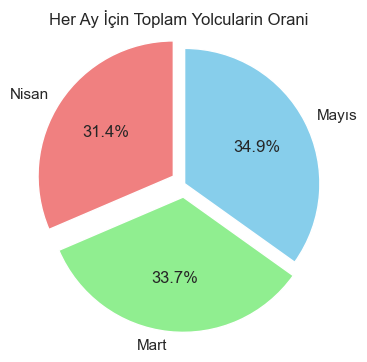

In [71]:
aylar = ['Mart', 'Nisan', 'Mayıs']
oranlar = [oran_mart, oran_nisan, oran_mayıs]
sirali_oranlar = sorted(zip(aylar, oranlar), key=lambda x: x[1], reverse=False)
aylar_sirali, oranlar_sirali = zip(*sirali_oranlar)

plt.figure(figsize=(4, 4))
plt.pie(oranlar_sirali, labels=aylar_sirali, autopct='%1.1f%%', startangle=90,explode=[.1,.1,0], colors=['lightcoral', 'lightgreen', 'skyblue'])
plt.title('Her Ay İçin Toplam Yolcularin Orani')
plt.axis('equal')
plt.show()

In [59]:
en_yogun_saatler_mayis = df[df['ay'] == 5].groupby('saat')['yolcuSayisi'].sum().nlargest(5).reset_index()
en_yogun_saatler_mayis_sali_carsamba = df[(df['ay'] == 5) & (df['haftanin_gunu'].isin(['Tuesday', 'Wednesday']))].groupby('saat')['yolcuSayisi'].sum().nlargest(5).reset_index()

print(en_yogun_saatler_mayis_sali_carsamba)

   saat  yolcuSayisi
0    17      4073749
1     8      3907680
2    16      3240397
3     7      3218392
4    18      3095210


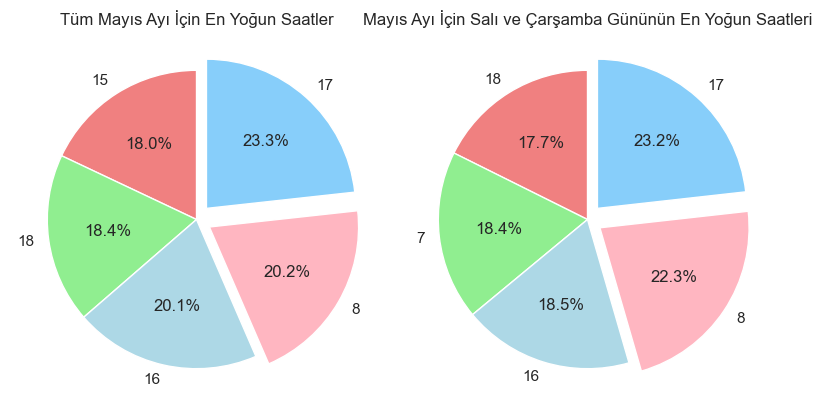

In [73]:
sorted_en_yogun_saatler_mayis = en_yogun_saatler_mayis.sort_values(by='yolcuSayisi', ascending=True)
sorted_en_yogun_saatler_mayis_sali_carsamba = en_yogun_saatler_mayis_sali_carsamba.sort_values(by='yolcuSayisi', ascending=True)
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.pie(sorted_en_yogun_saatler_mayis['yolcuSayisi'], labels=sorted_en_yogun_saatler_mayis['saat'], autopct='%1.1f%%', startangle=90, explode=[0, 0, 0,.1, .1], colors=['lightcoral', 'lightgreen', 'lightblue', 'lightpink', 'lightskyblue'])
plt.title('Tüm Mayıs Ayı İçin En Yoğun Saatler')

plt.subplot(1, 2, 2)
plt.pie(sorted_en_yogun_saatler_mayis_sali_carsamba['yolcuSayisi'].head(5), labels=sorted_en_yogun_saatler_mayis_sali_carsamba['saat'].head(5), autopct='%1.1f%%', startangle=90, explode=[0, 0, 0,.1, .1], colors=['lightcoral', 'lightgreen', 'lightblue', 'lightpink', 'lightskyblue'])
plt.title('Mayıs Ayı İçin Salı ve Çarşamba Gününün En Yoğun Saatleri')
plt.tight_layout()
plt.show()
